In [14]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

# Sample rate conversion

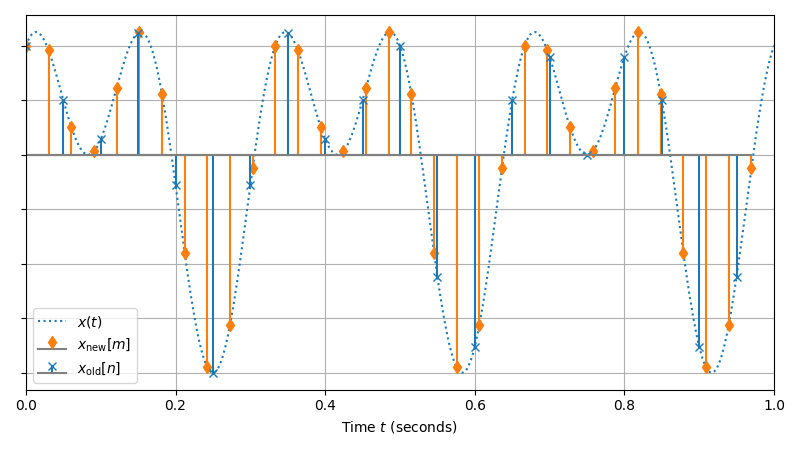

In [21]:
fs = 20  # Original Sampling Frequency
T = 1  # Signal duration
L = 5/3  # Upsampling Factor

t = np.linspace(0, 1, 501)  # "Continuous-time" vector 
t_n = np.linspace(0, T, fs*T, endpoint=False)  # Sample times before upsampling
t_m = np.linspace(0, T, int(fs*L*T), endpoint=False)  # Sample times after upsampling

x = lambda t: np.sin(np.pi*6*t) + np.cos(np.pi*12*t) # The continuous-time signal x(t)

plt.close(1); 
fig, ax = plt.subplots(num=1)
ax.plot(t, x(t), ":", label="$x(t)$")
ax.stem(t_m, x(t_m), markerfmt="C1d", linefmt="C1", label="$x_{\\text{new}}[m]$", basefmt="grey")
ax.stem(t_n, x(t_n), markerfmt="x", label="$x_{\\text{old}}[n]$", basefmt="grey")
ax.set_xlim(xmax=1)
ax.set_yticklabels("")
ax.legend()
ax.set_xlabel("Time $t$ (seconds)")
plt.savefig("resampling.png")

# Circuit Diagrams

In [23]:
%load_ext jupyter_tikz

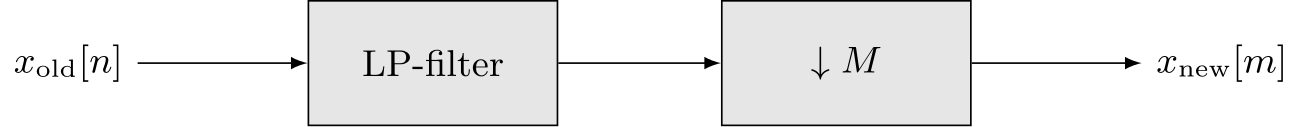

In [49]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S downsampling.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in](filt){$\text{LP-filter}$};
	\node[block, right of=filt, xshift=1cm](deci){$\downarrow M$};
	\node[output, right of=deci] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_{\text{old}}[n]$}--(filt.west){};
    \draw[->] (filt) -- (deci);
   	\draw[->] (deci) node[right]{}--(out) node[right]{$x_{\text{new}}[m]$};
\end{tikzpicture}

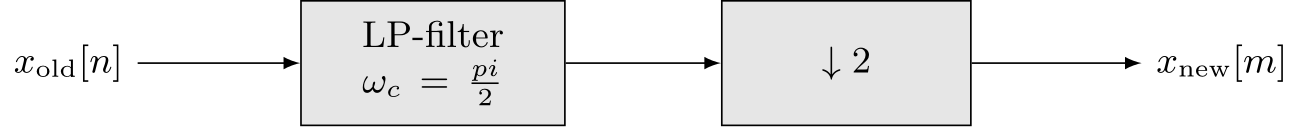

In [50]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S downsampling_example.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, text width=2cm, align=center](filt){LP-filter \\ $\omega_c = \frac{pi}{2}$};
	\node[block, right of=filt, xshift=1cm](deci){$\downarrow 2$};
	\node[output, right of=deci] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_{\text{old}}[n]$}--(filt.west){};
    \draw[->] (filt) -- (deci);
   	\draw[->] (deci) node[right]{}--(out) node[right]{$x_{\text{new}}[m]$};
\end{tikzpicture}

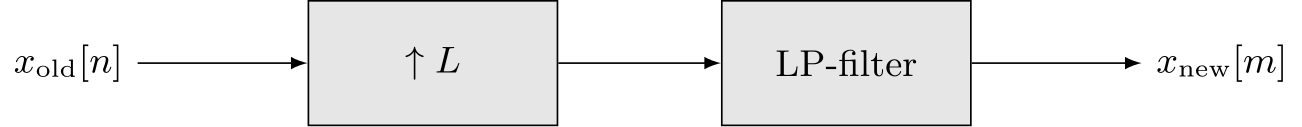

In [51]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S upsampling.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in](filt){$\uparrow L$};
	\node[block, right of=filt, xshift=1cm](deci){$\text{LP-filter}$};
	\node[output, right of=deci] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_{\text{old}}[n]$}--(filt.west){};
    \draw[->] (filt) -- (deci);
   	\draw[->] (deci) node[right]{}--(out) node[right]{$x_{\text{new}}[m]$};
\end{tikzpicture}

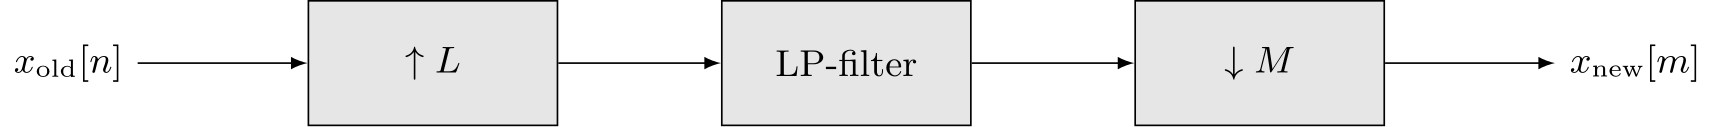

In [52]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S resampling.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
    \node[block, right of=in](interp){$\uparrow L$};
	\node[block, right of=interp, xshift=1cm](filt){$\text{LP-filter}$};
	\node[block, right of=filt, xshift=1cm](deci){$\downarrow M$};
	\node[output, right of=deci] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_{\text{old}}[n]$}--(interp.west){};
   \draw[->] (interp) -- (filt);
    \draw[->] (filt) -- (deci);
   	\draw[->] (deci) node[right]{}--(out) node[right]{$x_{\text{new}}[m]$};
\end{tikzpicture}

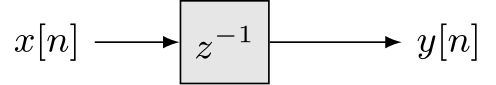

In [8]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S delay.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, minimum width=5mm, minimum height=7mm, xshift=-14mm](d1){$z^{-1}$};
	\node[output, right of=d1, xshift=-10mm] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x[n]$}--(d1) node[left]{};
   	\draw[->] (d1) node[right]{}--(out) node[right]{$y[n]$};
\end{tikzpicture}

In [ ]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S tapped_delay_line.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};                   
	\node[block, below of=c0, minimum width=5mm, minimum height=7mm, yshift=15mm](d0){$z^{-1}$};
    \node[block, below of=c0, minimum width=5mm, minimum height=7mm, yshift=15mm](d0){$z^{-1}$};
	\node[sum, right of=in, xshift=10mm, label={$b_0$}](b0){$\times$};
	\node[sum, right of=b0, xshift=10mm](s0){$+$};
	\node[sum, right of=s0, xshift=5mm](s0r){$+$};
    \node[mul, right of=s0r, xshift=30mm, label={$1/a_0$}](ma0){$\times$}; 
	\node[output, right of=ma0, xshift=-15mm] (out){};
	\node at ($(b0.west)-(1, 0)$) (c0){};
	\node at ($(ma0)-(.8, 0)$) (c0r){};

	% blocks 2nd level
	\node[block, below of=c0, minimum width=5mm, minimum height=7mm, yshift=15mm](d0){$z^{-1}$};
	\node[sum, below of=b0, yshift=-10mm, label={$b_1$}](b1){$\times$};
	\node[sum, below of=s0, yshift=-10mm](s1){$+$};
	\node[sum, below of=s0r, yshift=-10mm](s1r){$+$};
	\node[sum, right of=s1r, xshift=10mm, label={$- a_1$}](a1){$\times$};
	\node[block, below of=c0r, minimum width=5mm, minimum height=7mm, yshift=15mm](d0r){$z^{-1}$};
	
	% blocks M-th level
	\node[block, below of=d0, minimum width=5mm, minimum height=7mm, yshift=-5mm](d1){$z^{-1}$};
	\node[sum, below of=b1, yshift=-20mm, label={$b_M$}](b2){$\times$};
	\node[block, below of=d0r, minimum width=5mm, minimum height=7mm, yshift=-5mm](d1r){$z^{-1}$};
	\node[sum, below of=a1, yshift=-20mm, label={$-a_N$}](a2){$\times$};
	
	%lines
	\draw[->] (in) node[left]{$x[n]$}--(b0);
	\draw[->] (b0)--(s0);
	\draw[->] (s0)--(s0r);
	\draw[->] (s0r)--(ma0);
	\draw[->] (ma0)--(out) node[right]{$y[n]$};
	
	\draw[->] (c0.center)--(d0);
	\draw[->] (d0) |- (b1);
	\draw[->] (b1) -- (s1);
	\draw[->] (s1) -- (s0);
	\draw[->] (c0r.center) -- (d0r);
	\draw[->] (d0r) |- (a1);
	\draw[->] (a1) -- (s1r);
	\draw[->] (s1r) -- (s0r);
	
	\draw[->, dashed] (d0)--(d1);
	\draw[->] (d1) |- (b2);
	\draw[->, dashed] (b2) -| (s1);
	\draw (b2) -| ($(s1)-(0,1.5)$);
	
	\draw[->, dashed] (d0r)--(d1r);
	\draw[->] (d1r) |- (a2);
	\draw[->, dashed] (a2) -| (s1r);
	\draw (a2) -| ($(s1r)-(0,1.5)$);
	
	% delayed signals
	\node[below of=in, yshift=5mm, xshift=-2mm] {\tiny $x[n-1]$};
	\node[below of=in, yshift=-25mm, xshift=-1mm] {\tiny $x[n-N]$};
	\node[below of=ma0, yshift=5mm, xshift=2mm] {\tiny $y[n-1]$};
	\node[below of=ma0, yshift=-25mm, xshift=1mm] {\tiny $y[n-M]$};
	
	\node[right of=s0, yshift=-3mm, xshift=-18mm] {};
	
	\node[below of=b1, yshift=15mm]{\large $\vdots$};
	\node[below of=a1, yshift=15mm]{\large $\vdots$};

\end{tikzpicture}